In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
from matplotlib import animation
from IPython.display import HTML

In [3]:
nx = 81
nt = 101
rho_max = 10
u_max = 5
x = np.linspace(0, 2, nx - 1)

In [4]:
def computeF(u_max, rho_max, rho):
    return u_max * rho * (1 - rho / rho_max)

In [5]:
def wave_speed(u_max, rho_max, rho):
    return u_max * (1 - 2 * rho / rho_max)

In [6]:
def flow(u_max, rho_max, rho_l, rho_r):
    u_wl, u_wr = wave_speed(u_max, rho_max, np.asarray([rho_l, rho_r]))
    s = u_max * (1 - (rho_l + rho_r) / rho_max)
    # |\
    if u_wl > u_wr:
        rho_star = rho_l if s > 0 else rho_r
    else: # u_wr > u_wl 
        if u_wl > 0: # //
            rho_star = rho_l
        if u_wr < 0: # \\
            rho_star = rho_r   
        if u_wl < 0 and u_wr > 0: # \/
            rho_star = rho_max / 2
    F = computeF(u_max, rho_max, rho_star)
    return F

In [7]:
def initial(rho_max, u_max, nx):
    dx = 4 / (nx - 1)
    x = np.linspace(0, 4, nx - 1)
    rho = rho_max * x / 2
    rho[x >= 2] = 0
    return rho

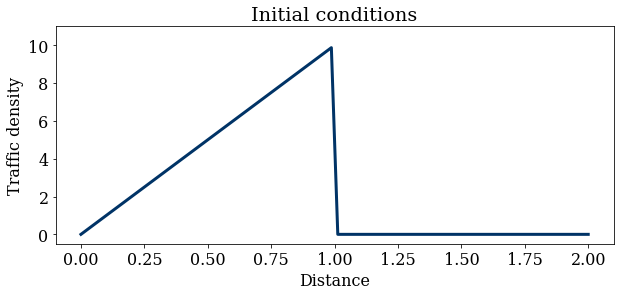

In [8]:
plt.figure(figsize=(10,4))
plt.plot(x, initial(rho_max=rho_max, u_max=u_max, nx=nx), color='#003366', ls='-', lw=3)
plt.ylabel('Traffic density')
plt.xlabel('Distance')
plt.ylim(-0.5,11.)
plt.title('Initial conditions');

In [9]:
def godunov(nt, nx, rho_max, u_max):
    Cu = 1
    dx = 4 / (nx - 1)
    dt = Cu * dx / u_max
    rho = np.zeros((nt, nx - 1))
    rho[0, :] = initial(rho_max=rho_max, u_max=u_max, nx=nx) # НУ
    rho[:, 0] = rho[0, 0]   # ГУ
    rho[:, -1] = rho[0, -1] # ГУ
    for t in range(nt-1):
        F = np.zeros(nx - 2)
        for i in range(nx - 2):
            F[i] = flow(u_max, rho_max, rho[t, i], rho[t, i + 1])
        rho[t + 1, 1:-1] = rho[t, 1:-1] - dt/dx*(F[1:] - F[:-1])
    return rho

In [10]:
rho = godunov(rho_max=rho_max, u_max=u_max, nx=nx, nt=nt)

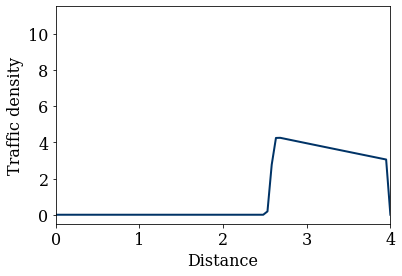

In [11]:
fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'))
line, = ax.plot([],[],color='#003366', lw=2);
def animate(data):
    x = np.linspace(0, 4, nx-1)
    y = data
    line.set_data(x,y)
    return line,
anim = animation.FuncAnimation(fig, animate, frames=rho, interval=50)
HTML(anim.to_jshtml())